<a href="https://colab.research.google.com/github/niral28/movie-lens-two-tower-recommendations/blob/main/FinalMovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
DATA_DIR='data'
# # ! wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip -P data/
# ! unzip archive.zip -d data/
#  ! unzip RecommendationSystem.zip -d ./
from RecommendationSystem import train

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train step 0: train loss 7.6631
val step 0: val loss 6.9109
train step 1: train loss 7.5365
val step 1: val loss 6.8620
train step 2: train loss 7.4180
val step 2: val loss 6.7836
train step 3: train loss 7.2852
val step 3: val loss 6.7196
train step 4: train loss 7.1849
val step 4: val loss 6.7057
train step 5: train loss 7.1094
val step 5: val loss 6.6987
train step 6: train loss 7.0484
val step 6: val loss 6.7131
train step 7: train loss 6.9975
val step 7: val loss 6.7426
train step 8: train loss 6.9569
val step 8: val loss 6.7712
train step 9: train loss 6.9145
val step 9: val loss 6.7868
train step 10: train loss 6.8817
val step 10: val loss 6.8270
Early stopping
test loss 6.0557
test loss 6.1480
test loss 6.0197
test loss 6.0367
test loss 5.9932
test loss 6.0390
test loss 6.0187
test loss 6.0302
test loss 6.0746
test loss 5.9482
test loss 6.0147
test loss 5.9381
test loss 6.0685
test loss 6.0365
test loss 6.0645
test loss 5.9853
test loss 5.9834
test loss 6.0630
test loss 5.1981


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


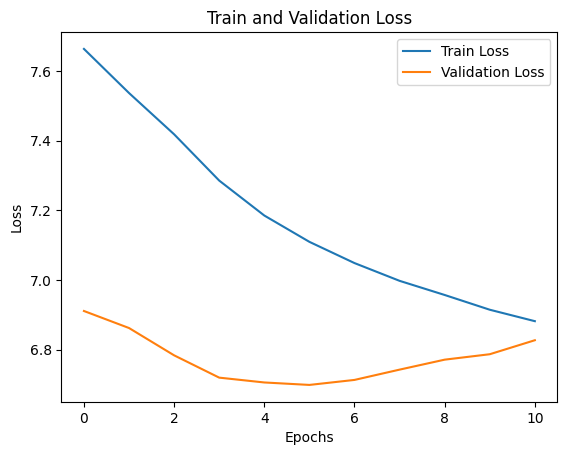

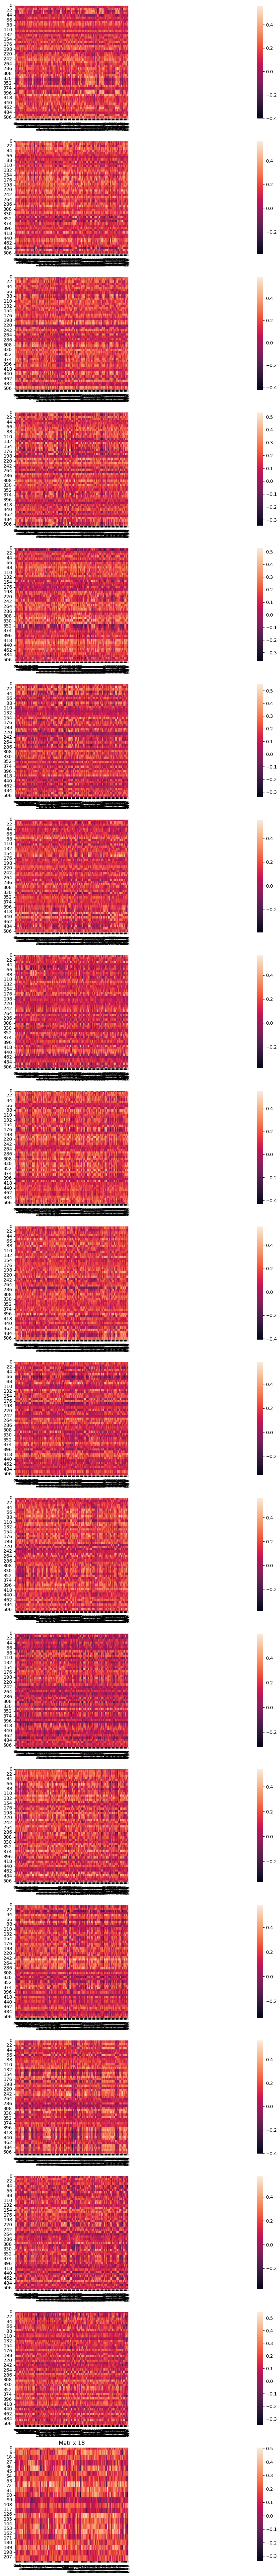

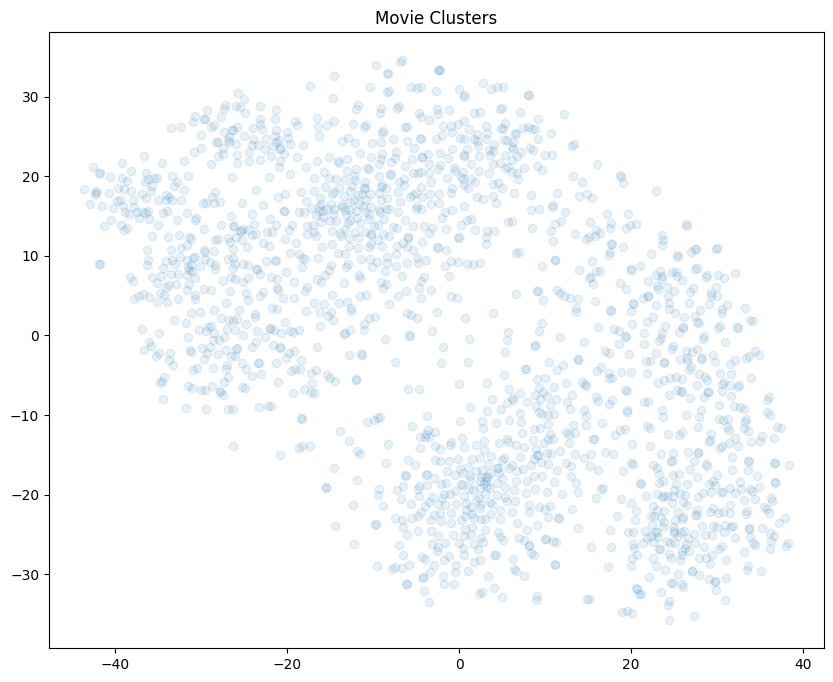

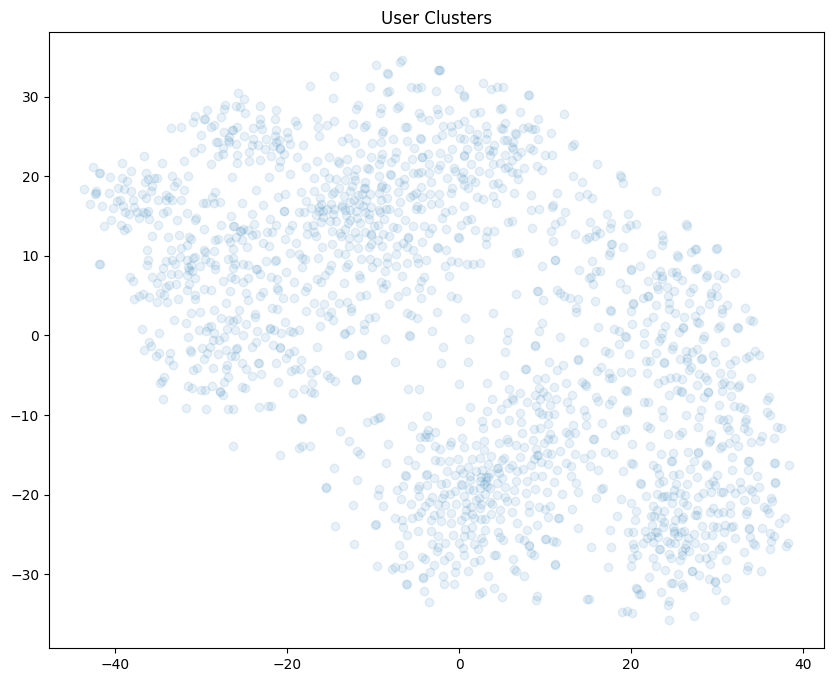

In [3]:
model_dict = train.train()

In [2]:
!pip install faiss-cpu
!pip install fuzzywuzzy
import faiss
from fuzzywuzzy import process

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# from RecommendationSystem.model import MovieTwoTowerModel



# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH, weights_only=True))
# model.eval()

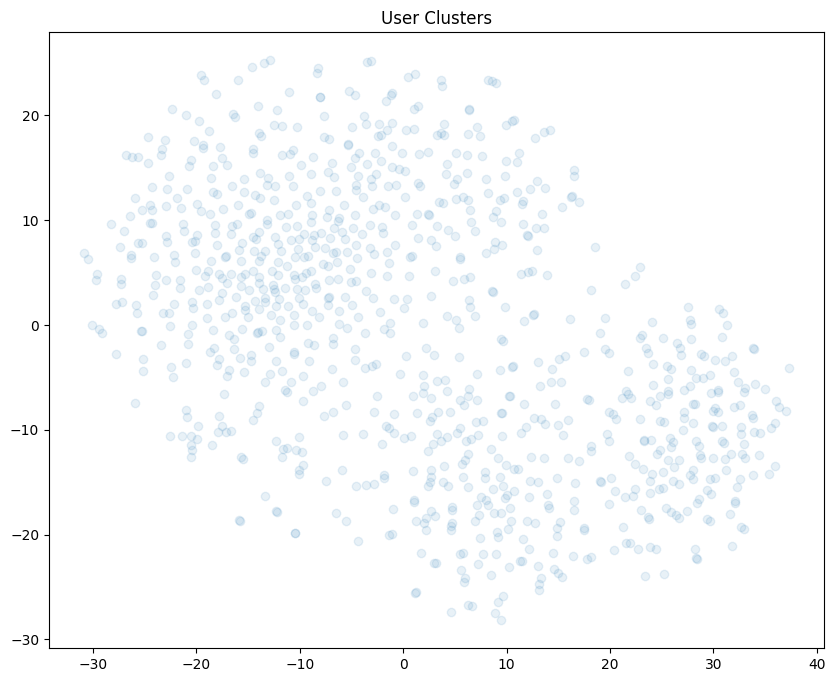

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
df_user = model_dict['df_user']
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(df_user.x, df_user.y, alpha=.1)
ax.set_title('User Clusters')
fig.savefig(os.path.join('data/', 'user_cluster.png'))

In [5]:
model_dict.keys()

dict_keys(['model', 'user_index', 'movie_index', 'df_item', 'df_data', 'df_user'])

In [7]:
model = model_dict['model']
user_index = model_dict['user_index']
movie_index = model_dict['movie_index']
df_item= model_dict['df_item']
df_user = model_dict['df_user']

In [10]:
df_data = model_dict['df_data']

In [11]:
df_data.head()

,userId,itemId,rating,timestamp,like
0,196,242,3,881250949,0
1,186,302,3,891717742,0
2,22,377,1,878887116,0
3,244,51,2,880606923,0
4,166,346,1,886397596,0


In [12]:
user_index

<faiss.swigfaiss_avx512.IndexFlatIP; proxy of <Swig Object of type 'faiss::IndexFlatIP *' at 0x7d267c530660> >

In [13]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
curr_df = df_user[df_user['userId']==13]



user_embeddings = model.user_tower(torch.tensor(curr_df['userId'].values, dtype=torch.long).to(device),
                                     torch.tensor(curr_df['age_group'].values, dtype=torch.long).to(device),
                                     torch.tensor(curr_df['gender'].values, dtype=torch.long).to(device),
                                     torch.tensor(curr_df['profession'].values, dtype=torch.long).to(device))
user_embeddings = user_embeddings.squeeze(0).detach().cpu().numpy()


In [18]:
movie_index.search(user_embeddings.reshape(1, -1), 10)

(array([[0.3079918 , 0.2839666 , 0.2738864 , 0.25131553, 0.249848  ,
         0.24800028, 0.24455214, 0.23422924, 0.23373768, 0.23064743]],
       dtype=float32),
 array([[829, 438, 776, 857, 667, 441, 787, 436, 803, 313]]))

In [17]:
user_embeddings.reshape(1, -1).shape

(1, 128)

In [34]:
df_data[df_data['itemId']==830]

,userId,itemId,rating,timestamp,like
4483,13,830,1,882397581,0


In [1]:
df_data

NameError: name 'df_data' is not defined